- Do songs from the same time periods have similar lengths?
- Does the length of a song have any impact on the popularity?
- Do certain trends exist with different genres flucuating in popularity over time?
- Can a model be created to acurately predict the popularity or genre of a song given features from the data?

In [1]:
import pandas as pd

spotify = pd.read_csv('songs_normalize.csv')
print(spotify.head())

           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0

# Do songs from the same time periods have similar lengths?

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

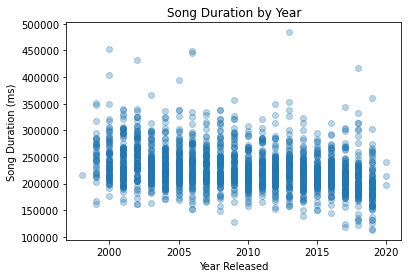

<Figure size 432x288 with 0 Axes>

In [3]:
plt.scatter(spotify.year, spotify.duration_ms, alpha=0.3)
plt.title('Song Duration by Year')
plt.xlabel('Year Released')
plt.ylabel('Song Duration (ms)')
plt.show()
plt.clf()

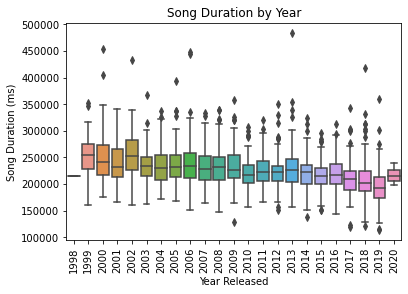

<Figure size 432x288 with 0 Axes>

In [4]:
ax = sns.boxplot(x=spotify.year, y=spotify.duration_ms,)
plt.title('Song Duration by Year')
ax.set_xticklabels(labels=spotify.year.sort_values().unique(),rotation=90)
plt.xlabel('Year Released')
plt.ylabel('Song Duration (ms)')
plt.show()
plt.clf()

It seems that song length is very consistent over time. There seems to be a slight downward trend overall, leading me to think that the songs that are popular are going to continue getting shorter over time. 2020 seems to be an increase in duration with no outliers, but this is due to the limited number of songs from 2020 in the data. The set is a list of popular songs from each year, not songs released each year, so I would also expect that the trends in duration found don't necessarily apply to the majority of songs released that year.

# Does the length of a song have any impact on the popularity?

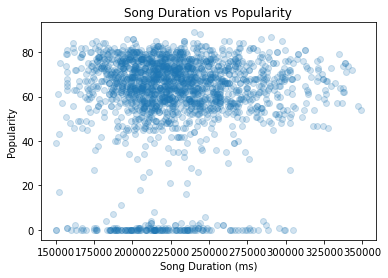

<Figure size 432x288 with 0 Axes>

In [5]:
duration = []
popularity = []
i = 0
for dur in spotify.duration_ms:
    if (dur > 150000) & (dur < 350000):
        duration.append(dur)
        popularity.append(spotify.popularity[i])
        i += 1
    else:
        i += 1
plt.scatter(duration, popularity, alpha=0.2)
plt.title('Song Duration vs Popularity')
plt.xlabel('Song Duration (ms)')
plt.ylabel('Popularity')
plt.show()
plt.clf()

Even without outliers, there seems to be no correlation between these variables. You could potentially be able to predict that once a song was over 300000ms it would be more popular, but there don't seem to be enough data points at this duration to really be able to say. It is also interesting to note that popularity is concentrated above 40 or at 0. There are very few data points that have a popularity rating within this range for some reason. There is a distinct lack of data points with 0 popularity between 250000 and 275000. This may indicate that songs of this length tend to be the most popular.

# Do certain trends exist with different genres flucuating in popularity over time?

In [6]:
print(spotify.genre.value_counts())

pop                                      428
hip hop, pop                             277
hip hop, pop, R&B                        244
pop, Dance/Electronic                    221
pop, R&B                                 178
hip hop                                  124
hip hop, pop, Dance/Electronic            78
rock                                      58
rock, pop                                 43
Dance/Electronic                          41
rock, metal                               38
pop, latin                                28
pop, rock                                 26
set()                                     22
hip hop, Dance/Electronic                 16
latin                                     15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               13
country                                   10
metal                                      9
hip hop, p

In [9]:
spotify['genre_new'] = spotify.genre
i = 0
for genre in spotify.genre_new:
    if genre in ['pop', 'hip hop, pop', 'hip hop, pop, R&B', 'pop, Dance/Electronic', 'pop, R&B', 'hip hop', 'hip hop, pop, Dance/Electronic']:
        i += 1
    else:
        spotify.genre_new[i] = 'other'
        i += 1
print(spotify.genre_new.value_counts())

other                             450
pop                               428
hip hop, pop                      277
hip hop, pop, R&B                 244
pop, Dance/Electronic             221
pop, R&B                          178
hip hop                           124
hip hop, pop, Dance/Electronic     78
Name: genre_new, dtype: int64


/var/folders/bj/yrwdktg903vbv5h8m09zt0rh0000gn/T/ipykernel_2089/3669657146.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify.genre_new[i] = 'other'


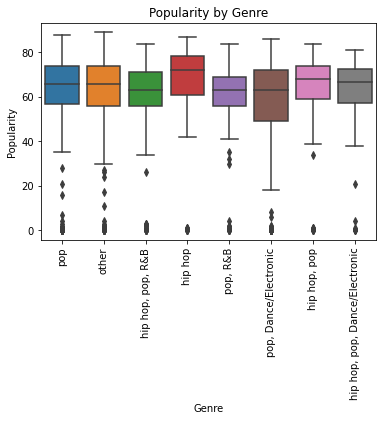

<Figure size 432x288 with 0 Axes>

In [10]:
ax = sns.boxplot(x=spotify.genre_new, y=spotify.popularity)
plt.title('Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
ax.set_xticklabels(spotify.genre_new.unique(), rotation=90)
plt.show()
plt.clf()

This initial boxplot can give some valuable insights into how much the popularity of genres has changed over time. The wider a genre's range, the more the popularity has changed within this data. For example, (pop, R&B) has a very narrow box while (pop, Dance/Electronic) has a much wider one. This tells us that the first has been a lot more consistent with popularity and the second has fluctuated more over time.

In [11]:
nine_eight = spotify.loc[spotify.year == 1998]
nine_nine = spotify.loc[spotify.year == 1999]
zero_zero = spotify.loc[spotify.year == 2000]
zero_one = spotify.loc[spotify.year == 2001]
zero_two = spotify.loc[spotify.year == 2002]
zero_three = spotify.loc[spotify.year == 2003]
zero_four = spotify.loc[spotify.year == 2004]
zero_five = spotify.loc[spotify.year == 2005]
zero_six = spotify.loc[spotify.year == 2006]
zero_seven = spotify.loc[spotify.year == 2007]
zero_eight = spotify.loc[spotify.year == 2008]
zero_nine = spotify.loc[spotify.year == 2009]
one_zero = spotify.loc[spotify.year == 2010]
one_one = spotify.loc[spotify.year == 2011]
one_two = spotify.loc[spotify.year == 2012]
one_three = spotify.loc[spotify.year == 2013]
one_four = spotify.loc[spotify.year == 2014]
one_five = spotify.loc[spotify.year == 2015]
one_six = spotify.loc[spotify.year == 2016]
one_seven = spotify.loc[spotify.year == 2017]
one_eight = spotify.loc[spotify.year == 2018]
one_nine = spotify.loc[spotify.year == 2019]
two_zero = spotify.loc[spotify.year == 2020]
yeardf_list = [nine_eight, nine_nine, zero_zero, zero_one, zero_two, zero_three, zero_four, zero_five, zero_six, zero_seven, zero_eight, zero_nine, one_zero, one_one, one_two, one_three, one_four, one_five, one_six, one_seven, one_eight, one_nine, two_zero]

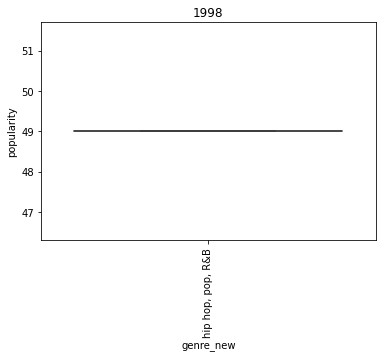

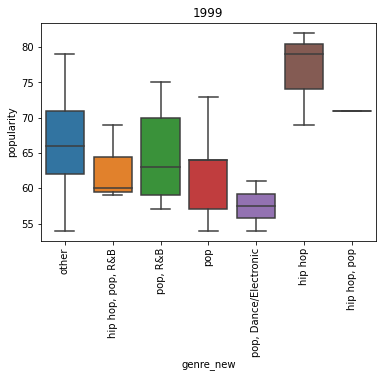

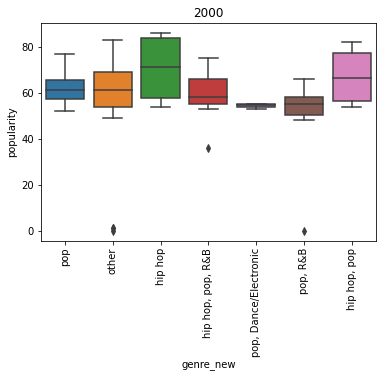

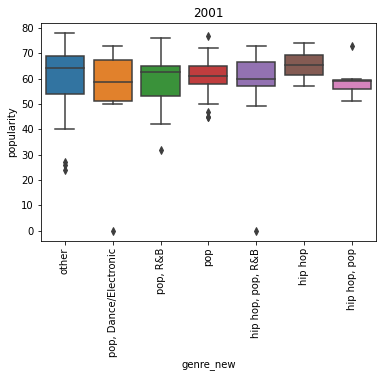

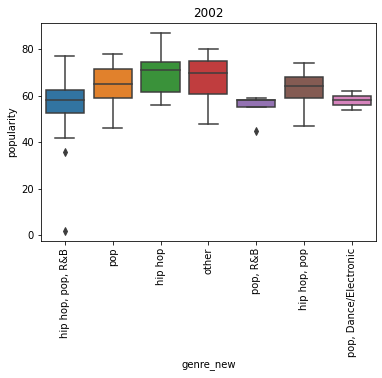

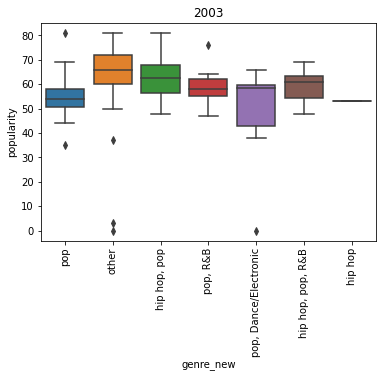

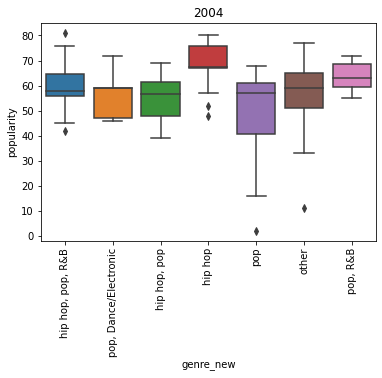

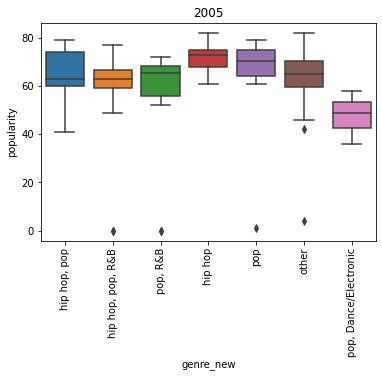

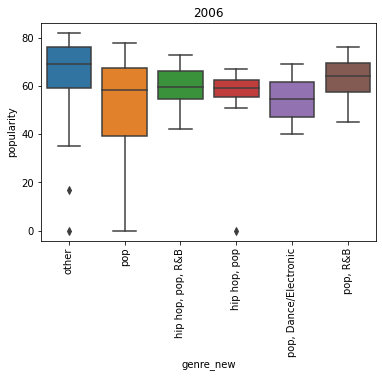

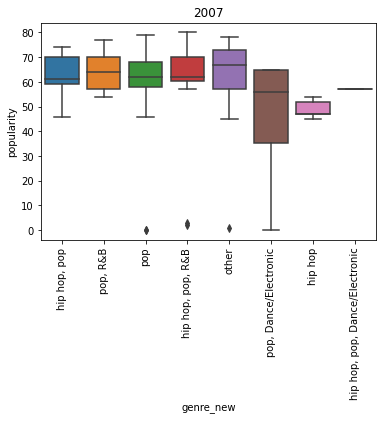

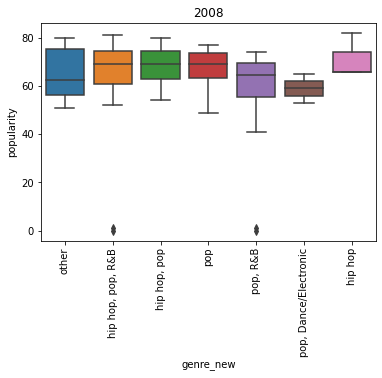

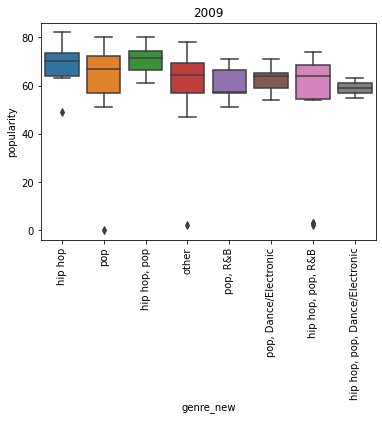

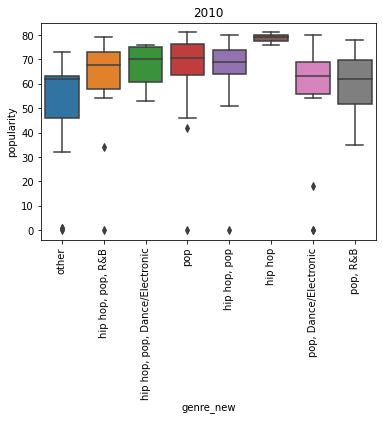

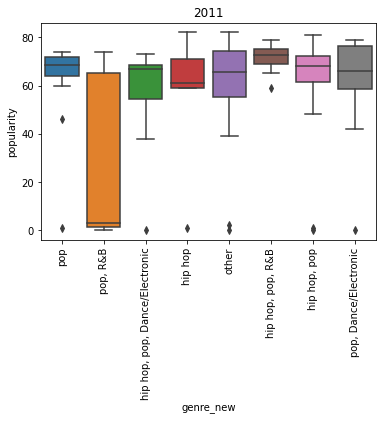

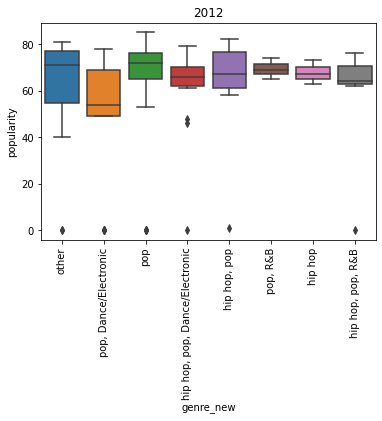

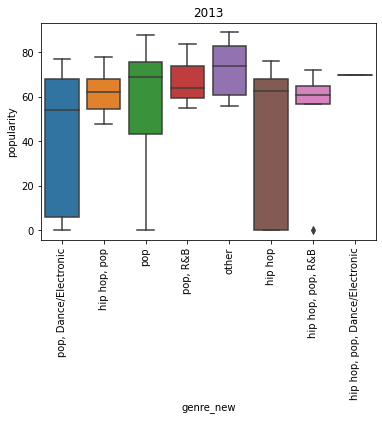

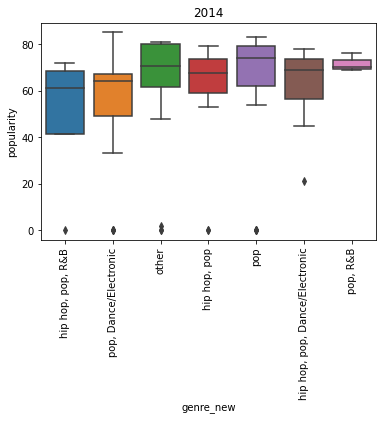

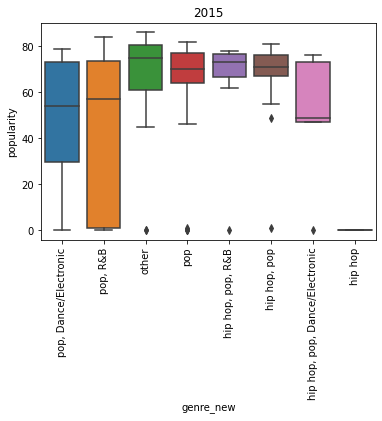

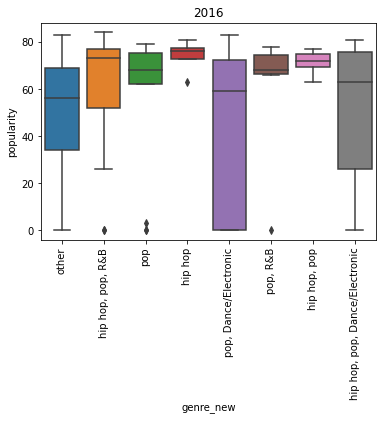

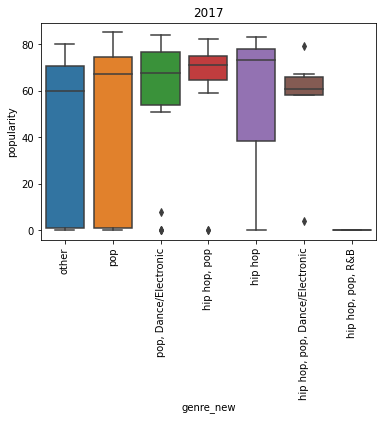

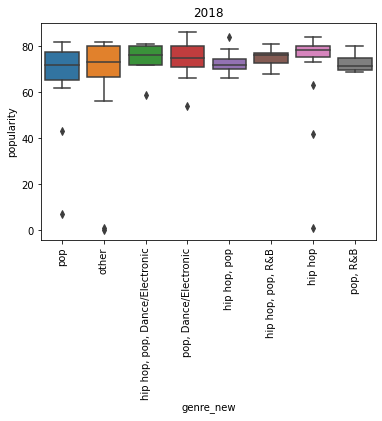

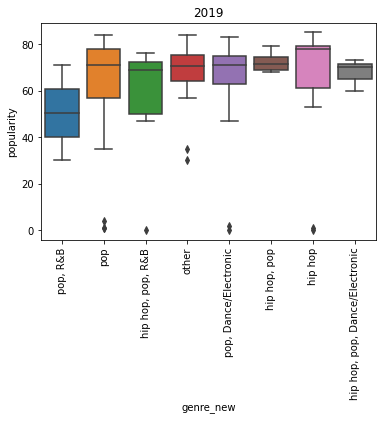

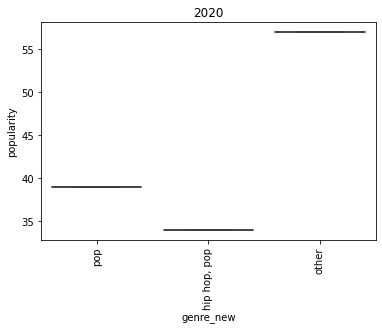

<Figure size 432x288 with 0 Axes>

In [12]:
year_num = 1998
for year in yeardf_list:
    ax = sns.boxplot(x=year.genre_new, y=year.popularity)
    plt.title(str(year_num))
    ax.set_xticklabels(year.genre_new.unique(), rotation=90)
    plt.show()
    plt.clf()
    year_num += 1

While these graphs are interesting in the fact that they illustrate which genres have been popular each year, it doesn't help much in answering whether the genres have fluctuated in popularity over time.

In [19]:
pop = spotify.loc[spotify.genre_new == 'pop']
hiphop_pop = spotify.loc[spotify.genre_new == 'hip hop, pop']
hiphop_pop_rb = spotify.loc[spotify.genre_new == 'hip hop, pop, R&B']
pop_dance = spotify.loc[spotify.genre_new == 'pop, Dance/Electronic']
pop_rb = spotify.loc[spotify.genre_new == 'pop, R&B']
hiphop = spotify.loc[spotify.genre_new == 'hip hop']
hiphop_pop_dance = spotify.loc[spotify.genre_new == 'hip hop, pop, Dance/Electronic']
other = spotify.loc[spotify.genre_new == 'other']
genredf_list = [pop, hiphop_pop, hiphop_pop_rb, pop_dance, pop_rb, hiphop, hiphop_pop_dance, other]
genrename_list = ['pop', 'hip hop, pop', 'hip hop, pop, R&B', 'pop, Dance/Electronic', 'pop, R&B', 'hip hop', 'hip hop, pop, Dance/Electronic', 'other']

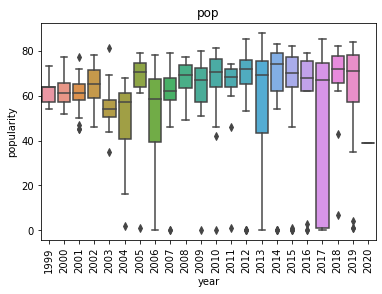

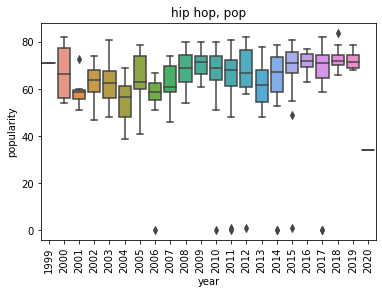

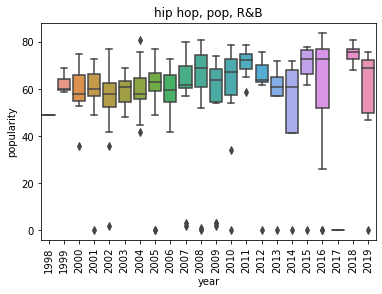

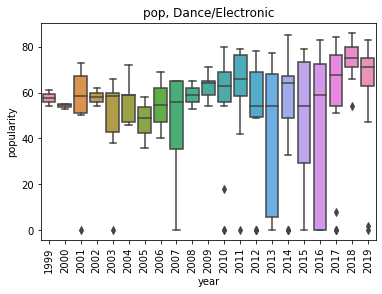

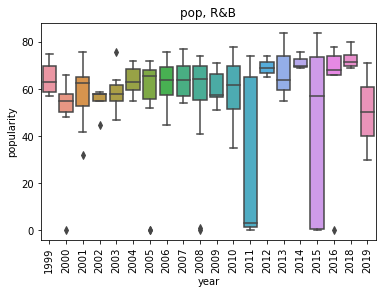

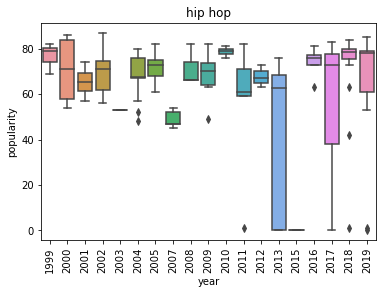

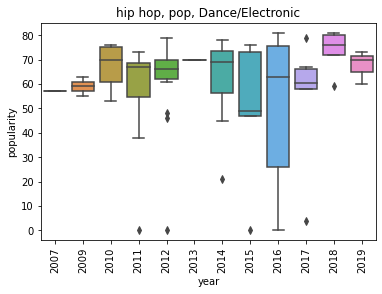

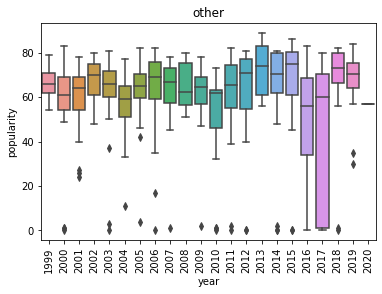

<Figure size 432x288 with 0 Axes>

In [20]:
i = 0
for df in genredf_list:
    ax = sns.boxplot(x=df.year, y=df.popularity)
    plt.title(genrename_list[i])
    ax.set_xticklabels(df.year.sort_values().unique(), rotation=90)
    plt.show()
    plt.clf()
    i += 1

Every genre seems to increase in popularity over time, which seems to indicate that more people are listening to music as time has gone on. Around the 2010's we can also see that the range of popularity for each genre increased a ton. I would attribute this to a combination of more people listening to music, and also more access to music in general. In 2000 you would have to listen to a song on the radio or find some way to purchase it, whereas nowadays you have a wide variety of free music options available. I was a bit surprised to see that genres like pop and hip hop still had relatively high popularity going back to the 2000's, while Dance/Electronic has grown more in popularity recently.

# Can a model be created to acurately predict the popularity or genre of a song given features from the data?

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [47]:
labels = spotify['popularity']
data = spotify[['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms', 'key', 'loudness']]
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=100)

In [48]:
tree = DecisionTreeClassifier(random_state=100)
tree.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=100)

In [49]:
print(tree.score(test_data, test_labels))

0.07


In [50]:
from sklearn.ensemble import RandomForestClassifier

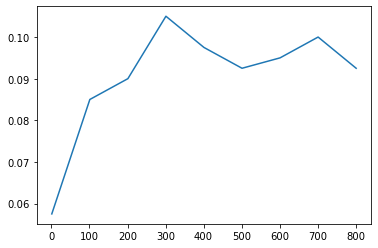

<Figure size 432x288 with 0 Axes>

In [98]:
scores = []
for n in range(1, 802, 100):
    forest = RandomForestClassifier(n_estimators=n, random_state=100)
    forest.fit(train_data, train_labels)
    scores.append(forest.score(test_data, test_labels))
plt.plot(range(1, 802, 100), scores)
plt.show()
plt.clf()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

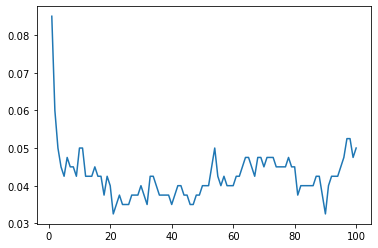

<Figure size 432x288 with 0 Axes>

In [99]:
scores = []
for n in range(1, 101):
    neighbors = KNeighborsClassifier(n_neighbors = n)
    neighbors.fit(train_data, train_labels)
    scores.append(neighbors.score(test_data, test_labels))
plt.plot(range(1, 101), scores)
plt.show()
plt.clf()

The best model I was able to create was the random forest, and it still only was able to achieve about 10% as the highest score. While it is probably possible to predict the popularity of a song, I think it would have more to do with external factors than details of the song. In my experience songs become popular through use in pop culture, and there's no rules about what song could be used. A recent example of this is the Kate Bush song that was used in Stranger Things 4. The song wasn't very popular when it was released, and maintained relatively low popularity until it was used in the show. On the flip side of this, we don't see other songs that are similar blowing up in popularity, and I would wager a bet that any song used in the context of the Kate Bush one would have seen a similar reaction from the public.

In [100]:
labels = spotify['genre']
data = spotify[['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms', 'key', 'loudness', 'popularity']]
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=100)

In [101]:
tree = DecisionTreeClassifier(random_state=100)
tree.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=100)

In [102]:
print(tree.score(test_data, test_labels))

0.21


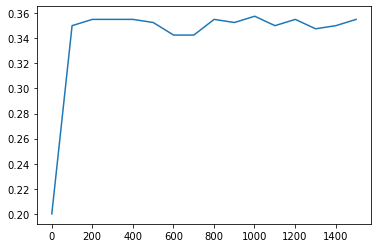

<Figure size 432x288 with 0 Axes>

In [107]:
scores = []
for n in range(1, 1502, 100):
    forest = RandomForestClassifier(n_estimators=n, random_state=100)
    forest.fit(train_data, train_labels)
    scores.append(forest.score(test_data, test_labels))
plt.plot(range(1, 1502, 100), scores)
plt.show()
plt.clf()

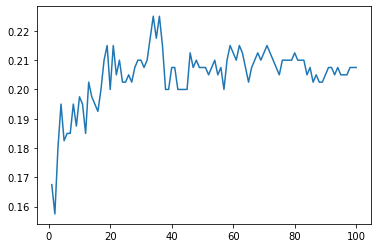

<Figure size 432x288 with 0 Axes>

In [105]:
scores = []
for n in range(1, 101):
    neighbors = KNeighborsClassifier(n_neighbors = n)
    neighbors.fit(train_data, train_labels)
    scores.append(neighbors.score(test_data, test_labels))
plt.plot(range(1, 101), scores)
plt.show()
plt.clf()

Using the default genre lables, I was able to create some models that performed much better. The random forest was the most accurate again, this time acheiveing a maximum score of about 36%. Next I'll see if using my condensed genre labels will help to make this even more accurate.

In [108]:
labels = spotify['genre_new']
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=100)

In [109]:
tree = DecisionTreeClassifier(random_state=100)
tree.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=100)

In [110]:
print(tree.score(test_data, test_labels))

0.295


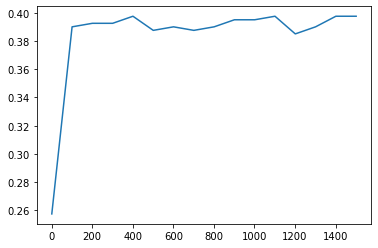

<Figure size 432x288 with 0 Axes>

In [111]:
scores = []
for n in range(1, 1502, 100):
    forest = RandomForestClassifier(n_estimators=n, random_state=100)
    forest.fit(train_data, train_labels)
    scores.append(forest.score(test_data, test_labels))
plt.plot(range(1, 1502, 100), scores)
plt.show()
plt.clf()

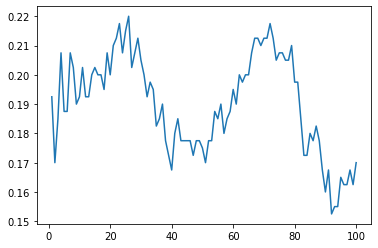

<Figure size 432x288 with 0 Axes>

In [112]:
scores = []
for n in range(1, 101):
    neighbors = KNeighborsClassifier(n_neighbors = n)
    neighbors.fit(train_data, train_labels)
    scores.append(neighbors.score(test_data, test_labels))
plt.plot(range(1, 101), scores)
plt.show()
plt.clf()

Using the condensed genre labels has created the best result so far. The random forest was able to reach a score of 40%, which is a massive improvement. It seems that the features of a song are more indicative of its genre than popularity. Now that I know which model will perform best, I will begin adjusting the features to see if I can get any more accurate.

In [113]:
data = spotify[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness', 'popularity']]
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=100)

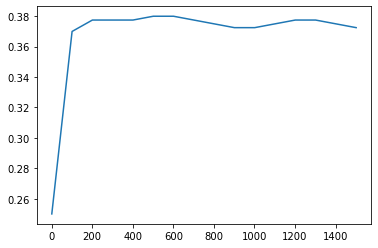

<Figure size 432x288 with 0 Axes>

In [114]:
scores = []
for n in range(1, 1502, 100):
    forest = RandomForestClassifier(n_estimators=n, random_state=100)
    forest.fit(train_data, train_labels)
    scores.append(forest.score(test_data, test_labels))
plt.plot(range(1, 1502, 100), scores)
plt.show()
plt.clf()

Removal of features seems to result in a drop of accuracy. Things like key or duration that you wouldn't think would have a big impact on genre seem to have more of an effect than I thought.

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [121]:
#duration popularity key loudness tempo
scaler = MinMaxScaler(feature_range=(0,1))

In [128]:
spotify['duration_scaled'] = scaler.fit_transform(spotify[['duration_ms']])
spotify['popularity_scaled'] = scaler.fit_transform(spotify[['popularity']])
spotify['key_scaled'] = scaler.fit_transform(spotify[['key']])
spotify['loudness_scaled'] = scaler.fit_transform(spotify[['loudness']])
spotify['tempo_scaled'] = scaler.fit_transform(spotify[['tempo']])

In [129]:
data = spotify[['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_scaled', 'key_scaled', 'loudness_scaled', 'popularity_scaled', 'tempo_scaled']]
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=100)

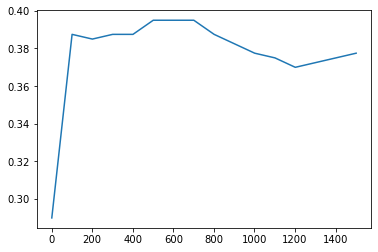

<Figure size 432x288 with 0 Axes>

In [130]:
scores = []
for n in range(1, 1502, 100):
    forest = RandomForestClassifier(n_estimators=n, random_state=100)
    forest.fit(train_data, train_labels)
    scores.append(forest.score(test_data, test_labels))
plt.plot(range(1, 1502, 100), scores)
plt.show()
plt.clf()

Scaling the features didn't have much of an impact on the model other than increasing the number of trees for the optimal score to 600. Most of the features are already scaled, and it seems the ones that aren't don't have a huge impact on the overall result.

The best model I created was able to predict the genre about 40% of the time. I suspect that the way the genres are formatted is creating issues. Currently, each song can have multiple genres listed. This overspecification means that there aren't enough consistent labels to predict. If the genres were condensed to one per song I think the model could be a lot more accurate, but this would require a lot of generalization and personal bias. What I would consider pop might be hip hop by someone else's standards.

In [131]:
from sklearn.cluster import KMeans

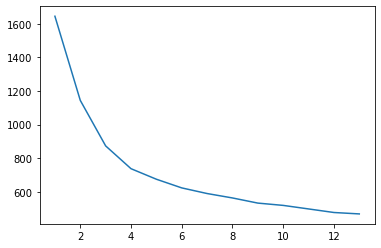

<Figure size 432x288 with 0 Axes>

In [132]:
inertias = []
for n in range(1, 14):
    cluster = KMeans(n_clusters=n, random_state=100)
    cluster.fit(data)
    inertias.append(cluster.inertia_)
plt.plot(range(1, 14), inertias)
plt.show()
plt.clf()

In [134]:
cluster = KMeans(n_clusters=14, random_state=100)
cluster.fit(data)
print(cluster.inertia_)
print(cluster.labels_)

454.3045878305216
[ 3 10  1 ... 11  7 10]


I counted the unique genre names from the list in the table (14) and tried clustering based on this number. The model definitely gets more accurate the closer it gets to 14, but the inertia still is relatively high. It also doesn't seem like the clusters that are generated really match up with the genres, so the model seems to be predicting something else instead. I think this model would be very useful given more clusters for predicting music that people would like, but it doesn't seem to help much in predicting the genre of a song.

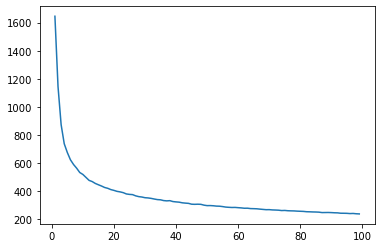

<Figure size 432x288 with 0 Axes>

In [135]:
inertias = []
for n in range(1, 100):
    cluster = KMeans(n_clusters=n, random_state=100)
    cluster.fit(data)
    inertias.append(cluster.inertia_)
plt.plot(range(1, 100), inertias)
plt.show()
plt.clf()

Going up the 100 clusters the model looks like its approaching a limit of ~200, but I think this may be due to overfitting. The data only reflects the songs that are popular, so may be very lacking in data for certain types of songs. This would ultimately result in a lack of accuracy when given songs that weren't popular.

# Conclusion and Next Steps

- Do songs from the same time periods have similar lengths?
    - The boxes for each year are pretty short, but also have long whiskers and many outliers. I think that for the majority of the popular songs, there is definitely a similar length based on time period, but also a general consistency across the entire dataset.
- Does the length of a song have any impact on the popularity?
    - Within the data there isn't a correlation between length and popularity, but I suspect this may be different given a dataset that includes songs not considered popular. The length of song is very consistent in the data, so it seems that it may have an impact despite no correlation in the graph.
- Do certain trends exist with different genres flucuating in popularity over time?
    - The only real trend I could find was that every genre became more popular over time, with Dance/Electronic being the most drastic case of this. I believe this rise in overall popularity is from more people listening to music, which in turn is a result of increased access to music with new technology.
- Can a model be created to acurately predict the popularity or genre of a song given features from the data?
    - The best a model could do was predicting accurately 40% of the time for genre, and only 10% of the time for popularity. The songs that end up being popular seem to be relatively diverse, making it hard to predict either feature.

- I think for a next step it woud be very helpful to gather this information on as many songs as possible to make a more accurate model for classification, and to see if the trends of this data are consistent with all songs.
- Perhaps rather than letting artists pick their genre tags, a model could do it. This may make some people feel less agency in their art, but I think given enough data the model would be more accurate and would result in everyone being more aware of genre distinction.
    - One caveat to the point is the fact that genre can be somewhat subjective. Many people may disagree on the genre of a song, especially with how constantly music is evolving.
- Could the information from this data be used to generate song structures that would end up being popular?